In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
innovation = pd.read_csv('innovation_rates_by_college.csv')
innovation.rename(columns={
    'instnm':'college_name',
    'count': 'total_students',
    'count_pq1': 'lower_class',
    'count_pq2': 'lower_middle_class',
    'count_pq3': 'middle_class',
    'count_pq4': 'upper-middle_class',
    'count_pq5': 'upper_class',
    'inventor_pq1': 'lower_class_inventor',
    'inventor_pq2': 'lower-middle_class_inventor',
    'inventor_pq3': 'middle_class_inventor',
    'inventor_pq4': 'upper_middle_class_inventor',
    'inventor_pq5': 'upper_class_inventor',
    'top5cit': 'top5citedinventors'}, inplace=True)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   super_opeid                  423 non-null    int64  
 1   college_name                 423 non-null    object 
 2   total_students               423 non-null    int64  
 3   lower_class                  423 non-null    int64  
 4   lower_middle_class           423 non-null    int64  
 5   middle_class                 423 non-null    int64  
 6   upper-middle_class           423 non-null    int64  
 7   upper_class                  423 non-null    int64  
 8   inventor                     423 non-null    float64
 9   lower_class_inventor         423 non-null    float64
 10  lower-middle_class_inventor  423 non-null    float64
 11  middle_class_inventor        423 non-null    float64
 12  upper_middle_class_inventor  423 non-null    float64
 13  upper_class_inventor

In [18]:
drop = [0,9,10,11,12,13,14]
innovation = innovation.drop(innovation.columns[drop], axis=1)
innovation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        423 non-null    object 
 1   total_students      423 non-null    int64  
 2   lower_class         423 non-null    int64  
 3   lower_middle_class  423 non-null    int64  
 4   middle_class        423 non-null    int64  
 5   upper-middle_class  423 non-null    int64  
 6   upper_class         423 non-null    int64  
 7   inventor            423 non-null    float64
 8   total_patents       423 non-null    int64  
 9   total_cites         423 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 33.2+ KB


In [19]:
baseline = pd.read_csv('baseline_cross-sec_estimates.csv')
baseline.rename(columns={
    'name':'college_name',
}, inplace=True)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 85 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   super_opeid           2202 non-null   int64  
 1   college_name          2202 non-null   object 
 2   type                  2199 non-null   float64
 3   tier                  2202 non-null   int64  
 4   tier_name             2202 non-null   object 
 5   iclevel               2199 non-null   float64
 6   region                2199 non-null   float64
 7   state                 2199 non-null   object 
 8   cz                    2199 non-null   float64
 9   czname                2199 non-null   object 
 10  cfips                 2199 non-null   float64
 11  county                2190 non-null   object 
 12  multi                 2199 non-null   float64
 13  count                 2202 non-null   float64
 14  female                2183 non-null   float64
 15  k_married            

In [20]:
drop = [0,2,4,5,7,8,9,10,11,13,14,15,20,22,24,30,34,36,38,41,42,44,46,49,51,54,56,59,61,64,66,69,71,74,76,78,79,80,81,82,83,84]
baseline = baseline.drop(baseline.columns[drop], axis=1)
baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        2202 non-null   object 
 1   tier                2202 non-null   int64  
 2   region              2199 non-null   float64
 3   multi               2199 non-null   float64
 4   mr_kq5_pq1          2202 non-null   float64
 5   mr_ktop1_pq1        2202 non-null   float64
 6   par_mean            2202 non-null   float64
 7   par_median          2202 non-null   int64  
 8   par_q1              2202 non-null   float64
 9   par_q3              2202 non-null   float64
 10  par_q5              2202 non-null   float64
 11  par_top10pc         2202 non-null   float64
 12  par_top5pc          2202 non-null   float64
 13  par_top1pc          2202 non-null   float64
 14  par_toppt1pc        2202 non-null   float64
 15  k_mean              2202 non-null   float64
 16  k_medi

In [21]:
merged_df = pd.merge(innovation, baseline, on='college_name')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        422 non-null    object 
 1   total_students      422 non-null    int64  
 2   lower_class         422 non-null    int64  
 3   lower_middle_class  422 non-null    int64  
 4   middle_class        422 non-null    int64  
 5   upper-middle_class  422 non-null    int64  
 6   upper_class         422 non-null    int64  
 7   inventor            422 non-null    float64
 8   total_patents       422 non-null    int64  
 9   total_cites         422 non-null    int64  
 10  tier                422 non-null    int64  
 11  region              422 non-null    float64
 12  multi               422 non-null    float64
 13  mr_kq5_pq1          422 non-null    float64
 14  mr_ktop1_pq1        422 non-null    float64
 15  par_mean            422 non-null    float64
 16  par_medi

In [31]:
college = pd.read_csv('college_level_characteristics.csv')
college.rename(columns={
    'name':'college_name',
}, inplace=True)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   super_opeid                       2463 non-null   int64  
 1   college_name                      2463 non-null   object 
 2   region                            2463 non-null   int64  
 3   state                             2463 non-null   object 
 4   fips                              2463 non-null   int64  
 5   cz                                2463 non-null   int64  
 6   czname                            2463 non-null   object 
 7   cfips                             2463 non-null   int64  
 8   county                            2449 non-null   object 
 9   zip                               2463 non-null   int64  
 10  tier                              2463 non-null   int64  
 11  tier_name                         2463 non-null   object 
 12  type  

In [32]:
drop = [0,2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,25,26,29,30,32,37,38,39,40]
college = college.drop(college.columns[drop], axis=1)
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   college_name                    2463 non-null   object 
 1   barrons                         2463 non-null   int64  
 2   exp_instr_pc_2000               2381 non-null   float64
 3   exp_instr_pc_2013               2455 non-null   float64
 4   ipeds_enrollment_2013           2463 non-null   int64  
 5   ipeds_enrollment_2000           2415 non-null   float64
 6   sticker_price_2013              2270 non-null   float64
 7   sticker_price_2000              2160 non-null   float64
 8   avgfacsal_2013                  2340 non-null   float64
 9   avgfacsal_2001                  2170 non-null   float64
 10  scorecard_netprice_2013         2451 non-null   float64
 11  scorecard_median_earnings_2011  2389 non-null   float64
 12  endowment_pc_2000               74

In [33]:
merged_df2 = pd.merge(merged_df, college, on='college_name')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   college_name                    422 non-null    object 
 1   total_students                  422 non-null    int64  
 2   lower_class                     422 non-null    int64  
 3   lower_middle_class              422 non-null    int64  
 4   middle_class                    422 non-null    int64  
 5   upper-middle_class              422 non-null    int64  
 6   upper_class                     422 non-null    int64  
 7   inventor                        422 non-null    float64
 8   total_patents                   422 non-null    int64  
 9   total_cites                     422 non-null    int64  
 10  tier                            422 non-null    int64  
 11  region                          422 non-null    float64
 12  multi                           422 

In [34]:
merged_df2['tier'] = merged_df2['tier'].astype('category')
merged_df2['region'] = merged_df2['region'].astype('category')
merged_df2['multi'] = merged_df2['multi'].astype('bool')
merged_df2['barrons'] = merged_df2['barrons'].astype('category')
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 74 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   college_name                    422 non-null    object  
 1   total_students                  422 non-null    int64   
 2   lower_class                     422 non-null    int64   
 3   lower_middle_class              422 non-null    int64   
 4   middle_class                    422 non-null    int64   
 5   upper-middle_class              422 non-null    int64   
 6   upper_class                     422 non-null    int64   
 7   inventor                        422 non-null    float64 
 8   total_patents                   422 non-null    int64   
 9   total_cites                     422 non-null    int64   
 10  tier                            422 non-null    category
 11  region                          422 non-null    category
 12  multi                 

In [36]:
merged_df2.to_csv('post_lasso_data_cleaning.csv', index=False)

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

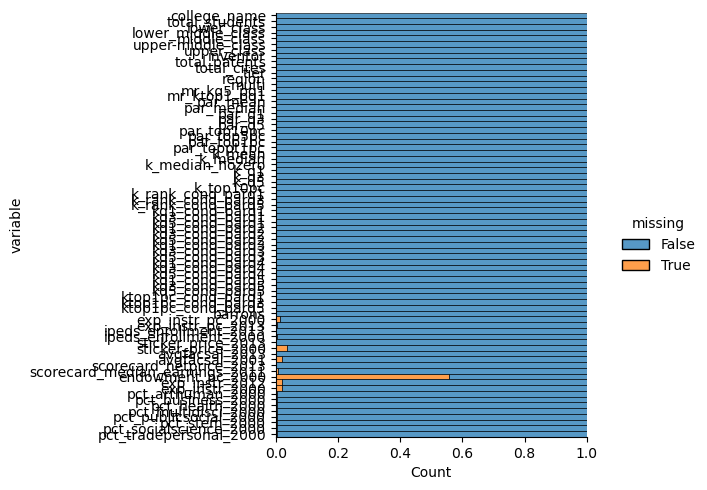

In [37]:
import seaborn as sns
sns.displot(
    data=merged_df2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)